# Welcome


Lets start by making a simple synthetic data set using the make_moons library. 


For this first task, we will focus on classification. For those who forgot, it is simply predicting an output in it's correct class.


The neural net benefits from data that's not linearly separable, otherwise, there would be no reason for neural network to be used for this task. 


To be clear, it does not require non-linearly separable data, but you wouldn't be utilizing it to it's full potential. It has the capacity to model non-linear boundaries.


Linearly separable data benefit from cheaper classification models like logistic regression, linear SVMs, and perceptrons. 

### Identify Linearly Separable data

You would know that data is linearly separable if you trained on these models and achieved near 100% accuracy. Especially since these models limited by making linear boundaries for their predictions.


Another way of checking if your data is linearly separable is by graphing your data. Usually for 2-dimensional data, if you can draw straight, linear lines seperating your classes, then it confirms your data can be linearly separable.


Now which method is better? Completly depends on you. You can attempt to visualize the data and draw lines or you can train and predict a logistic regression model.

### The better model for linearly separable data

Do not underestimate the neural network. It can still learn the linear boundary. However it can also learn an uncessarily curved boundary sepearting the classes.

Now which models are best for dealing with linearly separable data? 
- A deep network with many different layers(or even small)
- Or a single linear decision boundary?


Yeah you'd want to choose the simpler model. You could probably get similar results, but not always.The simpler models in this case will be less computationally expensive, and you may not have to deal with uneccessarily complex decision surfaces. Due to the neural nets capabilities, it may learn small bumps, and not generalize. It may do something called overfit to the data. Overfitting, to those who may have forgotten, is when the model gets too used to the training data. If it's creating a non-linear boundary for linear data, and another dataset is put in for testing the neural net after it has been trained, it may perform poorly.


This relates to something called bias-variance trade off. Where bias (related to underfitting of data) stems from overly simple assumptions, and variance(related to overfitting) arises from excessive sensitivty to the training data fluctuations. If you have too much bias, your model may be too simple, and not capture a proper relationships between features(inputs) and target(output). And if you have too much variance, your model may be too complex where it's perfect on the training data, but it's useless on the new testing data, as it completly ignore a proper relationship between feature and target, and instead memorized the relation/boundaries.


We will go into more on this soon, along with the layers that compose a neural net, so sit tight.


Key take away: just because you can, doesn't mean you should. Your goal should be simplier with better results. 




## The data

The make moons library presents the data usually in crescent shapes, where each class are their own crescents. For now we can focus on two classes.


We also will just focus on 2 features.


Remember, if we have n-features, then our data exists in an n-dimensional space.


We can visualize up to 3 features into a 3-dimensional space, however beyond 3, we cannot visualize beyond 3D. The geometry still exists, don't worry, we just cannot see it.


The scare may come beyond 2 and 3 dimensions, where you cannot physically graph the data. However do not fret, the models can understand the data. And you can too. If you still want visual representations, you can plot 2 features against each other in different combinations. These features all live in their respective dimension space(if we say we have n features, then they live in the n dimensional space), but you can still plot two or three against each other to explore relationships between the features. 


One thing you need to know for classifcation of data for all dimensions is that it is always possible to have a separator of sorts. If you have 2 dimensional data, your separator is a 1 dimensional line, or if you have 3 features, your separator can be a plane. 4 dimensions and onwards, hyperplanes. These are called linear separators.


However in case, there will be no linear separators when using the make moons dataset, which represents 2 dimensional data in crescents. We may see some linear seperators between 2 or more features in multi-feature datasets, but keep in mind, that may not explain the full picture of what's going on.


Also one more thing before we move on, inorder for both features to show importance to identifying the data point's correct class, they need to be in similar magnitudes. If one feature is scaling in the millions and the second feature is scaling in the tens, then the first feature will have such a bigger impact on the conclusions. So to prevent this, we need to use a standard scaling to normalize the values for each feature to a 0 to 1 range, instead of a range for example -15002008 to 3000200. Do not worry, the data is not lost, just transformed. 


This transformation is very useful to many algorithms, not just neural nets. They can perform better because the features contribute equally to the model's performance, just as how they should. Ofcourse models can determine that some features are obsolete as it trains, but here atleast we give the features an equal chance to see if they are relevant.


The standard scalar will also come back soon in the neural net. (For those who already know, its the gradient descent. With normalized features, convergence can happen much faster than without.)

If you are concerned about the function definitions or parameters, look at the api reference pages. (Do a quick google search of the library name and function name)

In [ ]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 
#Did not go over traintest split, but pretty much just splits up your dataset into a training dataset and a testing dataset.
#training data is what your model uses to learn the relationships. testing is used to test how well your model does on new data
from sklearn.preprocessing import StandardScaler

# 1) Create synthetic 2D data (two interleaving crescents)
X, y = make_moons(n_samples=2000, noise=0.25, random_state=42)

# 2) Split into train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# 3) Scale features (VERY important for neural nets)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

print("Shapes:")
print("X_train:", X_train_s.shape, "y_train:", y_train.shape)
print("X_val  :", X_val_s.shape, "y_val  :", y_val.shape)
print("X_test :", X_test_s.shape, "y_test :", y_test.shape)

# Plot our data

Using the non-scaled features, for now.

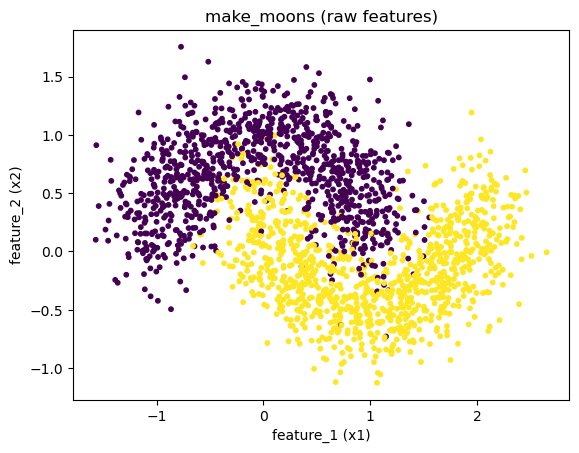

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)
plt.title("make_moons (raw features)")
plt.xlabel("feature_1 (x1)")
plt.ylabel("feature_2 (x2)")
plt.show()


Declare the Neural network:
MLPClassifier

This is a basic neural net classifier in sklearn

hidden layer sizes: how wide/deep the network is

activation: the nonlinear function inside the network

solver: how the neural network learns

alpha: helps prevents overfitting

max_iter: the max number of training step iterations.

In [5]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(16,16), #We are gonna have 2 hidden layers, each with size of 16 units
    activation="relu",
    solver="adam",
    alpha=1e-4,  #small regularization
    learning_rate_init=1e-3,
    max_iter=500,
    random_state=42

)

## Train and evaluate

In [6]:
from sklearn.metrics import accuracy_score

# Train
mlp.fit(X_train_s, y_train)

# Predict
train_pred = mlp.predict(X_train_s)
val_pred   = mlp.predict(X_val_s)
test_pred  = mlp.predict(X_test_s)

print("Accuracy:")
print("train:", accuracy_score(y_train, train_pred))
print("val  :", accuracy_score(y_val, val_pred))
print("test :", accuracy_score(y_test, test_pred))


Accuracy:
train: 0.9478571428571428
val  : 0.93
test : 0.95


## Breaking down the structure of a neural network

The neural net is bascially just input -> hidden -> output

For our neural net,


Input layer: we have 2 neurons (due to having 2 features), 


Hidden layer 1: 16 neurons


Hidden layer 2: 16 neurons


Output layer: 1 neuron (The binary classification)

2->16->16->1


The width of a neural network is the number of neurons in a layer. Since we are choosing 16 neurons for each hidden layer, this will be the width.

Keep in mind that more neurons means more flexibility, more modeling of complex patterns, and there is a higher risk of overfitting.


Deep/depth is the number of hidden layers. In our example, we are using 2 hidden layers.
If we had more layers, we can model more complex compositions of patterns, but then training can take longer, and results may not be worth the training time and performance trade off.



Now moving onto the activation function that we used. Each neuron computes a localized prediction by calculating a weighted sum of its inputs plus a bias term. 

$$ z = w_1 x_1 + w_2 x_2 + b $$


After this a nonlinear activation function is applied. This operation transforms input data into a representation that informs the overall network's final output. 


Without activation functions, the whole network collapses into one linear function of the weights and biases of each neuron, no matter how many layers you stack.

$$
\text{ReLU}(z) = \max(0, z)
$$

ReLU is the activation function we used. ReLU is a rectified linear unit.

$$
\text{ReLU}(z) = 
\begin{cases} 
z & \text{if } z > 0 \\
0 & \text{if } z \leq 0 
\end{cases}
$$

This activation function introduces non-linearity to the model, as you can see.


Moving onto the solver, in our case being adam.

The solver is how the network learns. Training menas adjusting weights to reduce mistakes. The solver is responsible for computing how wrong the network currently is. It is also responsible for adjusting weights to try to minimize this error. The adjustments depends but they are usually not too large when there is a hint of convergence. It is repeated many times.


Adam in particular is a modern optimization method. Think of it as a smart way of adjusting weights step by step. We will discuss more about optimization soon, but now understand that solver = learning rule.


Our next definition is alpha. This is the regularization strength. Regularization discourages the network from using very large weights. Why this is important? If weights become huge the model can fit tiny noise without it noticing, and it overfits more frequently by summarizing more than generalization.


Alpha adds a penalty for larger weights.
- If there is a small alpha -> weak penalty
- If there is a large alpha -> strong penalty


And finaly the max iterations. This is pretty straightforward. It limits how many times the algorithm loops through learning.


Based on what we learned, each iteration computes predictions, measures error, and updates weights.


More iterations may result in more learning opportunity, but it can take more time. Less iterations may lead to the model stopping before it's finished learning.

### The structure
Input (2 features)
    

Hidden layer (16 ReLU neurons)


Hidden layer (16 ReLU neurons)


Output neuron

### What does learning actually mean?

You may be confused on what learning actually means. We talked about when we spoke about the adam optimizer/solver.


A neural net has:
- weights
- predictions
- errors
Learning means adjusting the weights to reduce error. This adjustment process is called optimization

### Optimization
Optimization is finding the set of weights that minimizes the error.


Mathematically, we define a loss function which measures the wrongness. 
Then we are to find the weights that make loss as small as possible. 


You are at the top of a hill (high error)


You want to walk downhill (lower error)


Optimization is the strategy for stepping downhill


Adam (your solver) is just one strategy for stepping downhill.

### Epochs

An epoch is a single full pass through the training dataset.
Since we have 1400 training samples, and one epoch has passed the network has seen all 1400 once. If you train for 10 epochs, then the neural net has seen the entire dataset 10 times.


Iterations and epoch can be correlated. One iteration is rougly equal to one epoch in our code. 


Now the main reason why I am bring epochs and iterations back is because it would be smart to know when neural net learning is finished. You may not have the computational resources to train it for a long time, and it's also good to think efficently. Why keep training if it may have already converged. Maybe the model did not need 500 iterations, but only 200? Maybe it needs more iterations.


So instead of fixed iterations think about we can do.


I'll give you 3 methods:

#### Method 1:
Convergence checking. This is what sklearn does. 


Is the improvement in loss becoming very very small? If the loss stops decreasing meaningufully. The training will stop automatically. This is called convergence. Mathematically convergence can be found through different ways (optimzation, gradient descent)


#### Method 2:
Early stopping. This a modern and very important approach.


Instead of checking training loss, we check validation performance.


If validation accuracy stops improving for several epochs, we stop training. This is a very important implementation. If we do all we can to optimize the training data, we may not get good results for the testing set. Especially if we see that the training data is getting better and the validation/test data is getting worse, that means there is overfitting.


Remember: If training accuracy imporves but validation does not, the model is overfitting.


In sklearn to enable early stopping:

early_stopping=True


Then it:
- Splits off part of trainign as validation
- Monitors validation score
- Stops when there is no improvement

This is a must in deep learning, especially when things take hours to train.

#### Method 3:
Monitor Loss Curves, especially in deeper frameworks like pytorch and tensorflow


You should plot training loss and validation. 
If you see:
- Training loss keeps decreasing
- Validation loss increases
Then there is overfitting

Method 2 should be a must. You should incorporate in every deep learning process. 


### Lets do this

In [7]:
mlp = MLPClassifier(
    hidden_layer_sizes=(16, 16),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)

In [8]:
from sklearn.metrics import accuracy_score

# Train
mlp.fit(X_train_s, y_train)

# Predict
train_pred = mlp.predict(X_train_s)
val_pred   = mlp.predict(X_val_s)
test_pred  = mlp.predict(X_test_s)

print("Accuracy:")
print("train:", accuracy_score(y_train, train_pred))
print("val  :", accuracy_score(y_val, val_pred))
print("test :", accuracy_score(y_test, test_pred))


Accuracy:
train: 0.9364285714285714
val  : 0.9266666666666666
test : 0.9433333333333334


In [9]:
print("Iterations run:", mlp.n_iter_)
print("Did it converge?:", mlp.n_iter_ < mlp.max_iter)
print("Best validation score:", mlp.best_validation_score_)

Iterations run: 90
Did it converge?: True
Best validation score: 0.9428571428571428


Look at how many iterations we did! If we didn't do early stopping, we would have done all 1000 iterations! Huge computational save. 

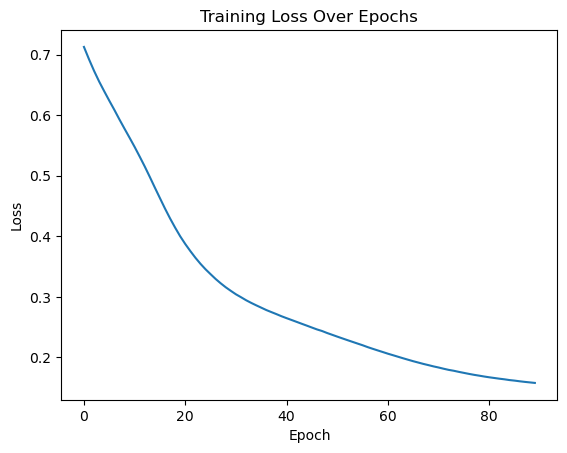

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Sklearn unfortunately does not store the validation loss per iteration/epoch


It only stores the training loss and the validation scores. Do not worry, more complex models do store it.

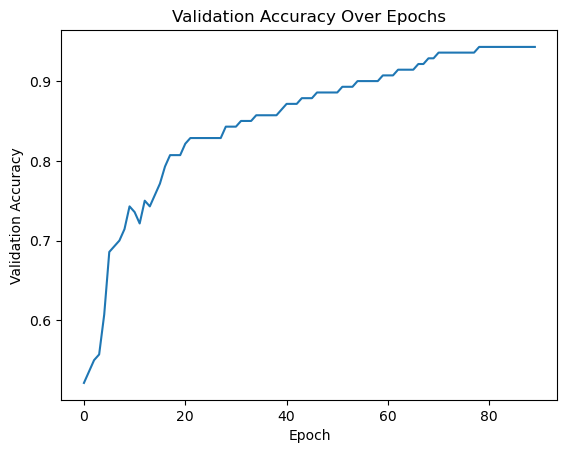

In [11]:
plt.figure()
plt.plot(mlp.validation_scores_)
plt.title("Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.show()

Keep in mind, when validation accuracy peaks, that is the point of best generalization.


After that point, if trainling loss decreases but validation accuracy decreases, the model is starting the memorize training specific details instead of learning general patterns -> overfitting

## Hyper Parameters

Hyperparameters are settings you choose before training. Each model has different hyperparameters. (i.e. random forests have number of trees)


They are not learned like weights, hyper parameters are chosen


You may believe trying random stuff manually and seeing what works is a good way of tuning.

But this can lead to bias, overfitting of your validation set, and inconsistent results.


What you should do is focus on systematic methods. And more advanced methods.


Here are 3 common methods:

#### Method 1
Grid search


A systematic approach where you can define a grid of ranges. Then all combinations are tried. It's a brute force structured method.

#### Method 2
Random Search


This is often better than grid search. We will go into specifics soon.

#### Method 3
This isn't one method, but smarter and more advanced methods
- Bayesian Optimization
- Hyperband
- Optuna
We will cover these in another notebook :) You should be excited to learn these methods, it will help you produce the best results as well save time.


### How to choose ranges?
This is where intuition and data understanding matters


#### Hidden Layers Size
If you notice that your training accuracy is very low, then your model is underfitting.


Try increasing the width or depth by increasing the amount of hidden layers or 


And if you notice that training accuracy is high, but the validation score is low, then your model is overfitting.


Try reducing the size or increase your regularization parameter.

#### Alpha (Regularization)
If you are over fitting, increase the alpha. If you are underfitting, decrease alpha

#### Learn Rate
If training loss decreases really slowly, increase the learning rate.


If training jumps wildly, decrease the learning rate.